# Installation des librairies

In [88]:
from seaborn import scatterplot
!pip install cvxopt


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importation des libairies des librairies

In [89]:
# Manipulation des données
import math
import numpy as np
import pandas as pd

# Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

# Modèles de régression
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Vérification des résultats de sklearn
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import cvxopt

# Répertoire de travail et gestion d'erreur
import os
import warnings

# Définition du repertoire de travail

In [90]:
# Définition du repertoire de travail
chemin = r"C:\Users\lajoi\Documents\1_PROGRAMME DE TRAVAIL\PROGRAMMATION\SimulationRidgeLasso"
os.chdir(chemin)

# Création des dossiers
try :
    # Création du dossier pour les graphiques
    os.mkdir('results_graphiques')

     # Création du dossier pour les bases de données
    os.mkdir('results_data')
except FileExistsError:
    print("L'un des dossiers existe déjà")


L'un des dossiers existe déjà


# 1. Simulation

In [91]:
# Noyau de reprdductibilité
random_state_seed = 1980

## 1.1 Residus

[]

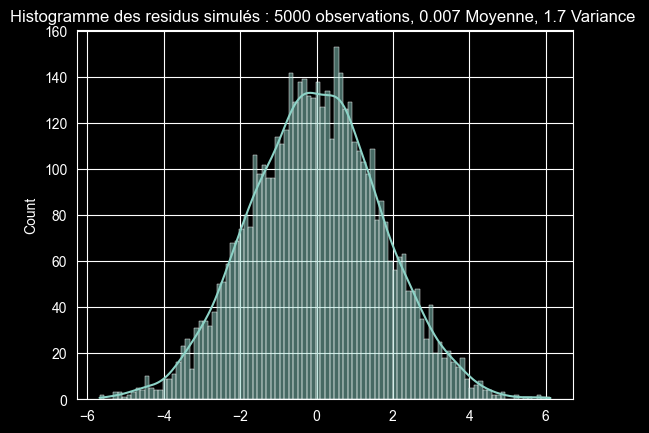

In [92]:
# Taille de la population
PopulationSize = 5000

# Paramètre de la loi Moyenne
LoiMoyenne = 0.007

# Paramètre de la variance
LoiVariance = 1.7

# Simulation de la loi des residus par une distribution gaussienne
np.random.seed(random_state_seed)
residus = np.random.normal(LoiMoyenne, LoiVariance, PopulationSize)

# Histograme de la distribution des residus
sns.histplot(residus, bins=100, kde=True)#density=True
plt.title(f"Histogramme des residus simulés : {PopulationSize} observations, {LoiMoyenne} Moyenne, {LoiVariance} Variance ")
plt.plot()

## 1.2 Modèle linéaire

In [93]:
# Vecteur des paramètres
'''
Automatiser le nombre de X grâce au calcul matriciel
'''
vecteur_B = [2.64, 1.81, 3]

# Variables explicatives
'''
Automatiser le nombre de X grâce au calcul matriciel
'''
X1 = np.random.rand(PopulationSize)
X2 = np.random.rand(PopulationSize)
X3 = np.random.rand(PopulationSize)


# Ecriture du modèle
'''
Automatiser le nombre de X grâce au calcul matriciel
'''
y = vecteur_B[0] * X1 + vecteur_B[1] * X2 + vecteur_B[2] * X3 + residus

# Base de données de la population
data_population = pd.DataFrame({
    "y":y,
    "X1":X1,
    "X2":X2,
    "X3":X3
})
data_population.head(5)

,y,X1,X2,X3
0,0.838802,0.009791,0.588061,0.333090
1,5.680146,0.852221,0.161801,0.534078
2,3.528761,0.373914,0.053122,0.766773
3,5.785770,0.392704,0.717692,0.940809
4,-0.375853,0.159318,0.077486,0.067234


In [94]:
data_population.to_csv("results_data/data_population.csv", index=False)

## 1.3 Echantillon

In [95]:
# Taille de l'échantillon
samplesize = 500

# Echantillon de la base de données
data_sample = data_population.sample(n=samplesize, random_state=1980)
data_sample.head()

,y,X1,X2,X3
708,5.742631,0.996699,0.444622,0.304311
4322,4.429499,0.325403,0.256783,0.539904
2719,3.551491,0.498651,0.249798,0.402936
218,0.139765,0.689120,0.378337,0.714665
1248,5.030823,0.530775,0.425301,0.503923


In [96]:
data_sample.to_csv("results_data/data_sample.csv", index=False)

# 2. Préparation des données

## 2.1 Séparation des données par Validation Croisée

In [97]:
# Base d'apprentissage et d'évaluation à l'aide de la validation croissée
data_train, data_test = train_test_split(data_sample, test_size=0.25, random_state=random_state_seed)

## 2.2 Sauvegarde des données

In [98]:
data_train.to_csv('results_data/data_train.csv', index = False)
data_test.to_csv('results_data/data_test.csv', index = False)

## 2.3 Choix de la base de données

In [99]:
# Bases de données probables
data_names = ['data_population', 'data_sample', 'data_train', 'data_test']

# Base de dnnées de l'étude
data_final = pd.read_csv(f"results_data/{data_names[2]}.csv")

# Aperçu de la base de données
data_final.head(5)

,y,X1,X2,X3
0,5.724352,0.380739,0.500768,0.914574
1,0.987226,0.040512,0.304980,0.835824
2,3.565487,0.195548,0.721182,0.318447
3,5.389680,0.744034,0.840312,0.551710
4,3.602006,0.367472,0.202832,0.571564


In [100]:
# Variable à prédire
Target = np.array(data_sample['y']).reshape(-1,1)

# Variables prédictives
Predictors = data_sample.drop('y', axis=1)

# Variables prédictives standardisées : Ridge et Lasso
# scaler = StandardScaler()
# Predictors_scaled_array = scaler.fit_transform(Predictors)
# Predictors_scaled = pd.DataFrame(Predictors_scaled_array, columns=Predictors.columns)

# 3. Régression Linéaire Multiple par MCO

## 3.1 Estimation

In [101]:
# Estimation du modèle de Régression par MCO avec constante
RegMCO = LinearRegression(fit_intercept=True)
RegMCO.fit(Predictors, Target)

LinearRegression()

## 3.2 Résultats

In [102]:
# Résultats du modèle de régression par MCO
RegMCO.coef_

array([[2.87029805, 1.87980811, 2.6689896 ]])

In [103]:
# Estimation du modèle de Régression par MCO avec constante
RegressionsModels = OLS(Target, sm.add_constant(Predictors))
regMC0_sm = RegressionsModels.fit()

# Résultats du modèle de régression par MCO
regMC0_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     86.95
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           3.21e-45
Time:                        12:15:01   Log-Likelihood:                -962.26
No. Observations:                 500   AIC:                             1933.
Df Residuals:                     496   BIC:                             1949.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0346      0.241      0.144      0.886      -0.438       0.507
X1             2.8703      0.260     11.019      0.000       2.358       3.382
X2             1.8798      0.264      7.129      0.000       1.362       2.398
X3             2.6690      0.260     10.246      0.000       2.157       3.181
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.499
Skew:                          -0.062   Prob(JB):                        0.287
Kurtosis:                       3.324   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Régression Régularisée RIDGE

## 4.1 Coefficient de Pénalisation

In [104]:
# Définition du coefficient de pénalisaton
CoefPenalisation = 0.15

## 4.2 Estimation

In [105]:
# Estimation du modèle par Régression Régularisée : Ridge
RegRidge = Ridge(alpha=CoefPenalisation, fit_intercept=True)
RegRidge.fit(Predictors, Target)

Ridge(alpha=0.15)

## 4.3 Résultats


In [106]:
RegRidge.coef_

array([2.85889334, 1.87287386, 2.6584636 ])

## 4.4 Vérification

In [107]:
# Estimation de la régression Ridge
regRidge_sm = RegressionsModels.fit_regularized(
    method='sqrt_lasso',
    alpha=CoefPenalisation,
    L1_wt=0
)

regRidge_sm_regularized = RegressionsModels.fit(start_params=regRidge_sm.params)
regRidge_sm_regularized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     86.95
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           3.21e-45
Time:                        12:15:01   Log-Likelihood:                -962.26
No. Observations:                 500   AIC:                             1933.
Df Residuals:                     496   BIC:                             1949.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0346      0.241      0.144      0.886      -0.438       0.507
X1             2.8703      0.260     11.019      0.000       2.358       3.382
X2             1.8798      0.264      7.129      0.000       1.362       2.398
X3             2.6690      0.260     10.246      0.000       2.157       3.181
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.499
Skew:                          -0.062   Prob(JB):                        0.287
Kurtosis:                       3.324   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Régression Régularisée LASSO


## 5.1 Estimation

In [108]:
# Estimation du modèle par Régression Régularisée : Lasso
RegLasso = Lasso(alpha=CoefPenalisation, fit_intercept=True)
RegLasso.fit(Predictors, Target)

Lasso(alpha=0.15)

## 5.2 Résultats


In [109]:
RegLasso.coef_

array([0.85904973, 0.02064704, 0.71276347])

# 6. Analyse des Prédictions des Modèles de Régression

In [110]:
# Création du dataframe
data_predictions = pd.DataFrame({"Obs_True":Target.ravel()})

In [111]:
# Prédiction des modèles de régression
RegMCO_y_s_pred = RegMCO.predict(Predictors)
RegRidge_y_s_pred = RegRidge.predict(Predictors)
RegLasso_y_s_pred = RegLasso.predict(Predictors)

In [112]:
# Matrice des prédictions
data_predictions['Obs_Pred_Mco'] = RegMCO_y_s_pred
data_predictions['Obs_Pred_Ridge'] = RegRidge_y_s_pred
data_predictions['Obs_Pred_Lasso'] = RegLasso_y_s_pred

In [113]:
# Aperçu de la base de données
data_predictions.head(5)

,Obs_True,Obs_Pred_Mco,Obs_Pred_Ridge,Obs_Pred_Lasso
0,5.742631,4.543385,4.539927,3.990082
1,4.429499,2.892257,2.895278,3.577449
2,3.551491,3.010836,3.013371,3.628508
3,0.139765,4.631167,4.627357,4.016973
4,5.030823,3.702485,3.702374,3.731707


In [114]:
# Sauvegarder de la base de données de prédiction
data_predictions.to_csv("results_data/data_predictions.csv", index=False)

# Visualisation des prédictions

[]

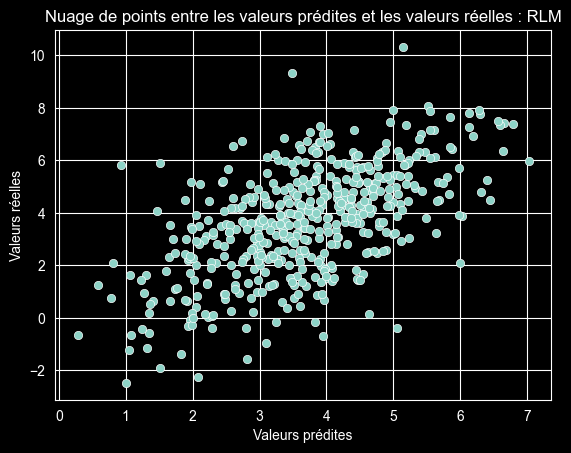

In [115]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Mco', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RLM')
plt.plot()


[]

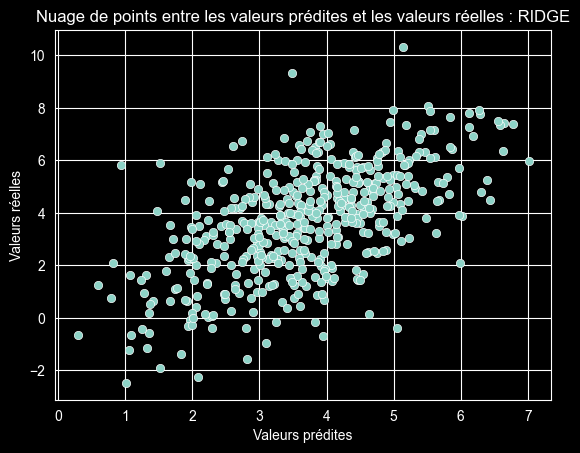

In [116]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Ridge', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RIDGE')
plt.plot()


[]

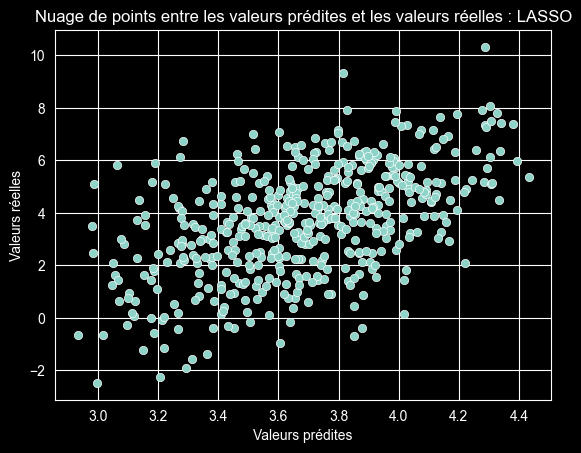

In [117]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Lasso', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : LASSO')
plt.plot()
